In [1]:
!pip install idx2numpy
!pip install python_mnist
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from mnist import MNIST
import idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp36-none-any.whl size=7905 sha256=be19eb6bd622542fb172bda885cb6122c1e15cf2979f523280539a2389a8811a
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_data=idx2numpy.convert_from_file('/content/drive/My Drive/MNIST/train-images-idx3-ubyte')
train_data = np.reshape(train_data,(60000,28*28))
train_label = idx2numpy.convert_from_file('/content/drive/My Drive/MNIST/train-labels-idx1-ubyte')
print(train_data.shape)
print(train_label.shape)

(60000, 784)
(60000,)


In [4]:
test_data=idx2numpy.convert_from_file('/content/drive/My Drive/MNIST/t10k-images-idx3-ubyte')
test_data = np.reshape(test_data,(10000,28*28))
test_label = idx2numpy.convert_from_file('/content/drive/My Drive/MNIST/t10k-labels-idx1-ubyte')
print(test_data.shape)
print(test_label.shape)

(10000, 784)
(10000,)


In [5]:
mnist_loader = MNIST('/content/drive/My Drive/MNIST')
train_data, train_label = mnist_loader.load_training()
test_data, test_label = mnist_loader.load_testing()
train_data = np.array(train_data)
train_label = np.array(train_label)
test_data = np.array(test_data)
test_label = np.array(test_label)

In [6]:
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [7]:
train_data[train_label == 1].shape
test_data[test_label == 1].shape

(1135, 784)

In [8]:
#Gathering only 4,7,8 labels of data
nx_train=[]
ny_train=[]
digit_1 = 0
for i in range(len(train_data)):
    if train_label[i] == 4 or train_label[i] == 7 or train_label[i] == 8:
        nx_train.append(train_data[i])
        ny_train.append(train_label[i])
        digit_1 += 1
nx_train=np.array(nx_train)
ny_train=np.array(ny_train)

print(len(nx_train))
print(type(nx_train))
print(len(ny_train))
print(type(ny_train))
print(digit_1)

17958
<class 'numpy.ndarray'>
17958
<class 'numpy.ndarray'>
17958


In [9]:
nx_test=[]
ny_test=[]
digit_1 = 0
for i in range(len(test_data)):
    if test_label[i] == 4 or test_label[i] == 7 or train_label[i] == 8:
        nx_test.append(test_data[i])
        ny_test.append(test_label[i])
        digit_1 += 1

nx_test=np.array(nx_test)
ny_test=np.array(ny_test)

print(len(nx_test))
print(type(nx_test))
print(len(ny_test))
print(type(ny_test))
print(digit_1)

2771
<class 'numpy.ndarray'>
2771
<class 'numpy.ndarray'>
2771


(784, 784)
(17958, 2)


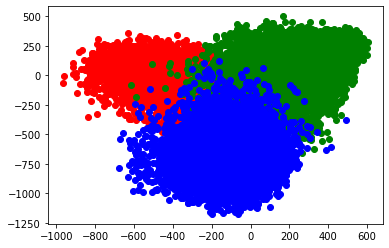

Original Data Size: (17958, 784) 
Modified Data Size: (17958, 2)


In [10]:
class LDA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.eig_vectors = None
    
    def transform(self,X,y):
        height, width = X.shape
        unique_classes = np.unique(y)
        num_classes = len(unique_classes)
        scatter_t = np.cov(X.T)*(height - 1)
        scatter_w = 0
        for i in range(num_classes):
            class_items = np.flatnonzero(y == unique_classes[i])
            scatter_w = scatter_w + np.cov(X[class_items].T) * (len(class_items)-1)
        scatter_b = scatter_t - scatter_w
        _, eig_vectors = np.linalg.eigh(np.linalg.pinv(scatter_w).dot(scatter_b))
        print(eig_vectors.shape)
        pc = X.dot(eig_vectors[:,::-1][:,:self.n_components])
        print(pc.shape)
        if self.n_components == 2:
            if y is None:
                plt.scatter(pc[:,0],pc[:,1])
            else:
                colors = ['r','g','b']
                labels = np.unique(y)
                for color, label in zip(colors, labels):
                    class_data = pc[np.flatnonzero(y==label)]
                    plt.scatter(class_data[:,0],class_data[:,1],c=color)
            plt.show()
        return pc

X_train, X_test, Y_train, Y_test = nx_train,nx_test,ny_train,ny_test
#The dimension of the output is necessarily less than the number of classes so possibile dimenshion are
LDA_obj = LDA(n_components=2)
LDA_object = LDA(n_components=2)
X_train_modified = LDA_object.transform(X_train, Y_train)
print("Original Data Size:",X_train.shape, "\nModified Data Size:", X_train_modified.shape)
#The dimension of the output is necessarily less than the number of classes in the given condition 
#we have 4,7,8  which is 3 classes so highest number of output dimenshion  in this case we use is 2
